In [67]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, OPTICS

iris = datasets.load_iris()

X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)
# iris.data.shape
iris.feature_names
# iris.data
# y.tail(20)

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

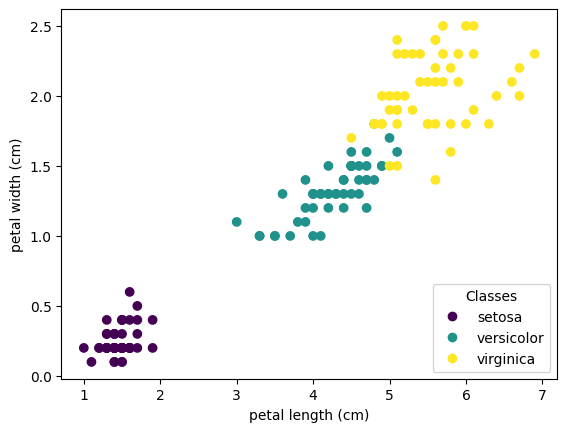

In [14]:
_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 2], iris.data[:, 3], c=iris.target)
ax.set(xlabel=iris.feature_names[2], ylabel=iris.feature_names[3])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

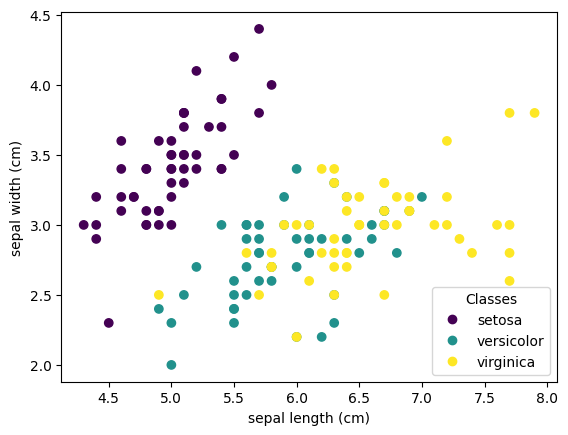

In [54]:
_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

In [65]:
X_3reduced = PCA(n_components=3).fit_transform(iris.data)
X_2reduced = PCA(n_components=2).fit_transform(iris.data)

X_2reduced = pd.DataFrame(X_2reduced, columns=['Feature 1', 'Feature 2'])
X_2reduced

,Feature 1,Feature 2
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755
...,...,...
145,1.944110,0.187532
146,1.527167,-0.375317
147,1.764346,0.078859
148,1.900942,0.116628


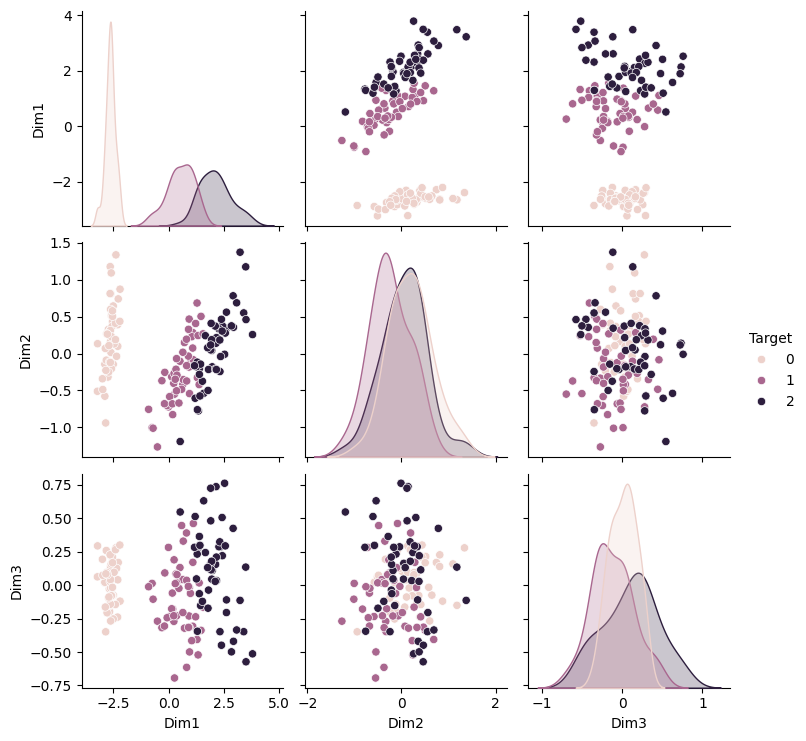

In [47]:
ppdf = pd.DataFrame(X_3reduced, columns=['Dim1', 'Dim2', 'Dim3'])
ppdf['Target'] = iris.target

sns.pairplot(ppdf, hue='Target')
plt.show()

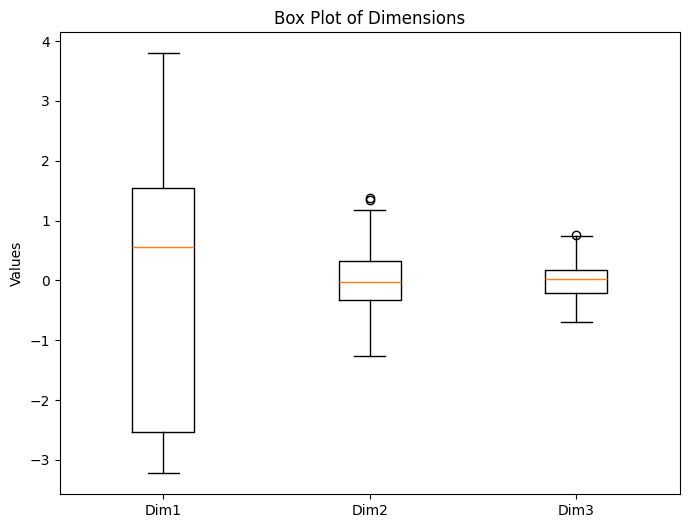

In [49]:
plt.figure(figsize=(8, 6))
plt.boxplot(X_3reduced, labels=['Dim1', 'Dim2', 'Dim3'])
plt.ylabel('Values')
plt.title('Box Plot of Dimensions')
plt.show()

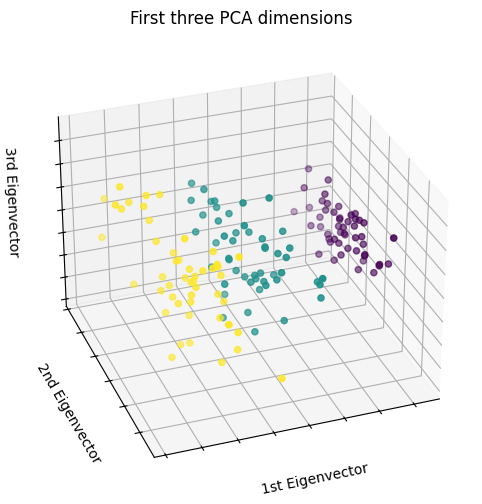

In [46]:
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

ax.scatter(
    X_3reduced[:, 0],
    X_3reduced[:, 1],
    X_3reduced[:, 2],
    c=iris.target,
    s=20,
)

ax.set_title("First three PCA dimensions")
ax.set_xlabel("1st Eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd Eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd Eigenvector")
ax.zaxis.set_ticklabels([])

plt.show()

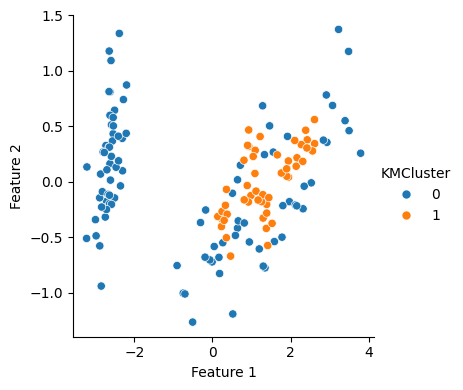

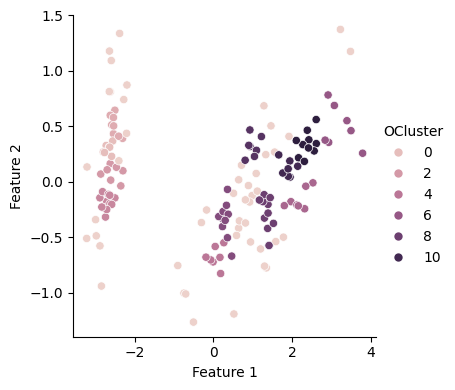

In [70]:
kmeans = KMeans(n_clusters = 2, n_init = 10)
optics = OPTICS(min_samples=4, xi=0.05, min_cluster_size=0.05)

X_2reduced["KMCluster"] = kmeans.fit_predict(X_2reduced)
X_2reduced["OCluster"] = optics.fit_predict(X_2reduced)

sns.relplot(
    x="Feature 1", y="Feature 2", hue="KMCluster", data=X_2reduced, height=4,
)
sns.relplot(
    x="Feature 1", y="Feature 2", hue="OCluster", data=X_2reduced, height=4,
)

